<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [3]:
file_address = '/content/NGC_6822/Data/final_cleaned_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.replace('', 89.99)
df = df.fillna(89.99)


In [4]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
Mid,,,,,,,,,,
1,10870.00,296.18,-14.82,17.52,0.04,16.53,0.04,16.19,0.05,S
2,10784.00,296.22,-14.83,17.45,0.03,16.53,0.04,16.20,0.06,S
3,11004.00,296.27,-14.81,17.60,0.03,16.62,0.03,16.27,0.05,S
4,11029.00,296.28,-14.80,17.46,0.03,16.55,0.02,16.22,0.05,S
5,12050.00,296.25,-14.82,18.17,0.07,17.25,0.10,16.70,0.05,S
...,...,...,...,...,...,...,...,...,...,...
381,89.99,296.00,-14.97,18.39,89.99,17.56,89.99,17.21,89.99,C
382,89.99,297.18,-14.45,18.53,89.99,18.26,89.99,17.29,89.99,C
383,89.99,297.11,-14.49,18.19,89.99,17.38,89.99,16.66,89.99,C


In [5]:
X = df['J'] -  df['Ks']
Y = df['Ks']

In [6]:
df_ukirt = pd.read_csv('/content/NGC_6822/Data/UKIRT_file.csv')
df_ukirt

,_RAJ2000(deg),_DEJ2000(deg),RAJ2000(deg),DEJ2000(deg),JmagUKIRT(mag),e_JmagUKIRT(mag),HmagUKIRT(mag),e_HmagUKIRT(mag),KmagUKIRT(mag),e_KmagUKIRT(mag)
0,295.899750,-14.510397,295.899750,-14.510397,18.873,0.111,18.584,0.101,18.196,0.100
1,295.899750,-14.610637,295.899750,-14.610637,18.853,0.110,18.453,0.091,18.253,0.106
2,295.899750,-14.784898,295.899750,-14.784898,16.839,0.024,16.196,0.017,16.024,0.018
3,295.899750,-15.129128,295.899750,-15.129128,17.198,0.026,16.619,0.025,16.384,0.026
4,295.899780,-14.623633,295.899780,-14.623633,17.481,0.035,17.145,0.030,17.054,0.038
...,...,...,...,...,...,...,...,...,...,...
25843,296.568726,-14.955183,296.568726,-14.955183,15.879,0.010,15.518,0.009,15.475,0.012
25844,296.568756,-14.650425,296.568756,-14.650425,14.848,0.005,14.194,0.004,13.962,0.005
25845,296.568848,-14.714405,296.568848,-14.714405,18.644,0.091,18.012,0.081,17.687,0.072
25846,296.568848,-14.725469,296.568848,-14.725469,16.881,0.020,16.481,0.021,16.413,0.024


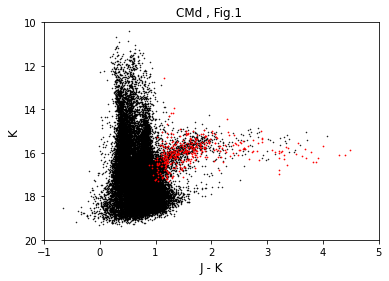

In [20]:
plt.scatter(df_ukirt['JmagUKIRT(mag)'] - df_ukirt['KmagUKIRT(mag)'], df_ukirt['KmagUKIRT(mag)'], color = 'black', marker = '.', s = 1)
plt.scatter(X, Y, color = 'red', marker = '.' , s = 2)
plt.title("CMd , Fig.1 " ,fontsize = 12 )
plt.xlim(-1,5)
plt.ylim(10,20)
plt.ylabel('K' , fontsize = 12 )
plt.xlabel('J - K', fontsize = 12 )
plt.gca().invert_yaxis()
plt.show()
#plt.savefig('HRD_Fig_1' , dpi=300)

In [ ]:
|